# Pneumonia Detection

In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dir = '...train'
test_dir = '...test'
val_dir = '...val'

In [71]:
normal_path = '...NORMAL\\IM-0007-0001.jpeg'
pneumonia_path = '...PNEUMONIA\\person1_virus_7.jpeg'

In [73]:
normal = load_img(normal_path, target_size=(150,150))
normal = img_to_array(normal)
normal = np.expand_dims(normal, axis=0)/255
pneumonia = load_img(pneumonia_path, target_size=(150,150))
pneumonia = img_to_array(pneumonia)
pneumonia = np.expand_dims(pneumonia, axis=0)/255

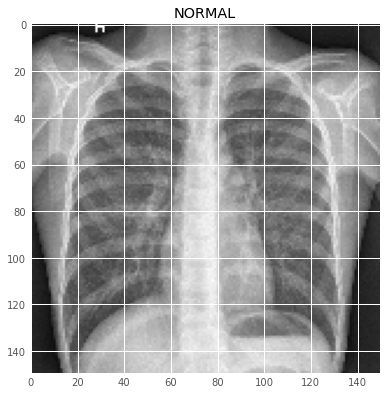

In [75]:
plt.figure(figsize=(6,6))
plt.title("NORMAL")
plt.imshow(normal[0])
plt.show()

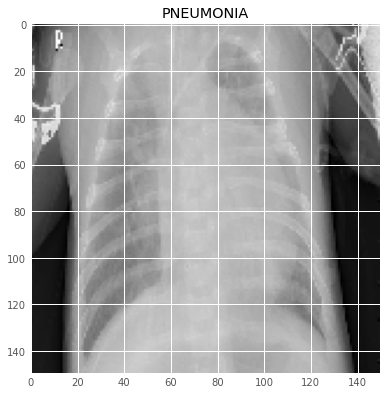

In [76]:
plt.figure(figsize=(6,6))
plt.title("PNEUMONIA")
plt.imshow(pneumonia[0])
plt.show()

### Preprocessing function

In [4]:
def ppf(x_set):
    x_set = img_to_array(x_set)
    return x_set

### Train, test, validation sets and augmentation

In [5]:
datagen = ImageDataGenerator(rescale = 1./255, 
                                  preprocessing_function=ppf,
                                  brightness_range = [0.75, 1.25],
                                  zoom_range = 0.1)

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=ppf)

In [7]:
train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    interpolation="nearest",
)

Found 5216 images belonging to 2 classes.


In [8]:
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=20,
    shuffle=True,
    interpolation="nearest",
)

Found 624 images belonging to 2 classes.


In [9]:
val_gen = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=4,
    shuffle=True,
    interpolation="nearest",
)

Found 16 images belonging to 2 classes.


### Model

In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,1), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2, padding ='same'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2, padding ='same'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2, padding ='same'))
model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides=2, padding ='same'))
model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)       

In [13]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.3, patience=3, min_lr=0.00003)

In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen,
    callbacks=reduce_lr,
    verbose=1
)

Epoch 1/15
  1/163 [..............................] - ETA: 0s - loss: 1.2004 - accuracy: 0.4062WARNING:tensorflow:From C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
163/163 [==============================] - 500s 3s/step - loss: 0.4756 - accuracy: 0.8570 - val_loss: 38.5909 - val_accuracy: 0.5000
Epoch 2/15
163/163 [==============================] - 483s 3s/step - loss: 0.1974 - accuracy: 0.9310 - val_loss: 29.5424 - val_accuracy: 0.5000
Epoch 3/15
163/163 [==============================] - 469s 3s/step - loss: 0.1549 - accuracy: 0.9486 - val_loss: 4.1449 - val_accuracy: 0.6250
Epoch 4/15
163/163 [==============================] - 428s 3s/step - loss: 0.1468 - accuracy: 0.9523 - val_loss: 3.7847 - val_accuracy: 0.6250
Epoch 5/15
163/163 [==============================] - 429s 3s

### Visualization 

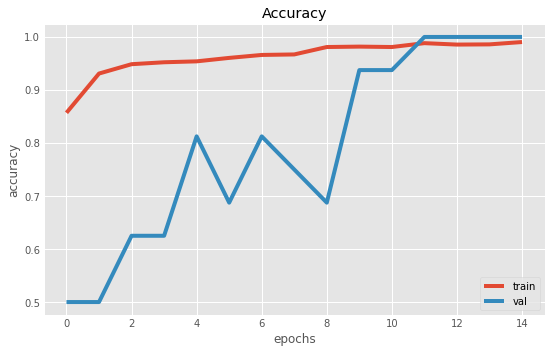

In [20]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.style.use('ggplot')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

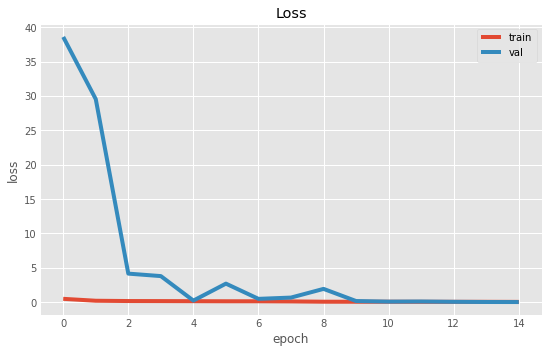

In [21]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.style.use('ggplot')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [23]:
score = model.evaluate(test_gen, steps=5, verbose=1)
print('Loss: ', score[0])
print('Accuracy: ', score[1]*100)

5/5 [==============================] - 5s 1s/step - loss: 1.1185 - accuracy: 0.8600
Loss:  1.1185314655303955
Accuracy:  86.00000143051147


Model classified pneumonia and normal x-ray images with 86% accuracy

### Outputs of layers

In [39]:
random_image_path = '...NORMAL2-IM-1427-0001.jpeg'

In [54]:
random_image = load_img(random_image_path, target_size=(150,150), color_mode="grayscale")
random_image = img_to_array(random_image)
random_image = np.expand_dims(random_image, axis=0)/255
print(random_image.shape)

(1, 150, 150, 1)


random_image:

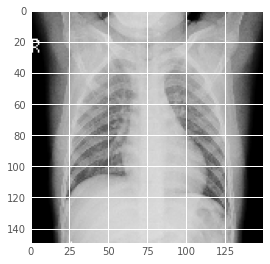

In [53]:
plt.imshow(random_image[0])
plt.show()

In [44]:
from keras import models

In [55]:
layer_outputs = [layer.output for layer in model.layers[0]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(random_image)

In [56]:
first_layer_activation = activations[0]

Activation of 4th channel of first layer for random image:

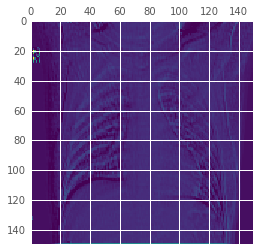

In [57]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

Activation of 2nd channel of first layer for random image:

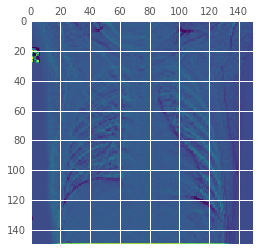

In [61]:
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')